## Import Libraries

## Define the Problem
Can CO2 be accurately predicted knowing the Population, Biomass, Geothermal, Solar, Wind, Hydro, Coal, Petroleum, Gas, Nuclear, Other energy sources from the Energy Generation by State and Technology (2009) dataset? 

The dataset: Provides annual energy generation/ production for all states by fuel source (e.g. coal, gas, solar, wind) in 2009, reported in MWh. Also includes facility-level data (directly from EIA Form 923). National Renewable Energy Laboratory. (2014). Energy Generation by State and Technology (2009) [data set]. Retrieved from https://data.openei.org/submissions/249.

---

### Import Libraries

Working in Python 3.9.12 and the Package versions are:
- pandas: 1.5.3
- numpy: 1.23.5
- statsmodels: 0.14.2
- matplotlib: 3.9.2
- seaborn: 0.13.2
- scikit-learn: 1.2.2

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

### Import Data

In [3]:
raw_co2_data = pd.read_csv('energy by state and sector.csv')

# Create a copy of the data
co2_data = raw_co2_data.copy()
co2_data.head()

,State,Region,population,Occupied Housing Units,Govoner Party,Carbon Dioxide emissions (million metric tons),Biomass,Geothermal,Solar,Wind,...,Nuclear,Other,Total Generated,Total Non0Hydro RE (MWh),Total RE Generation (MWh),Non Hydro RE Generation As total %,All RE Generation as Total %,Non Hydro RE Energy,Latitude,Longitude
0,Alabama,Southeast,4779736,1883791,R,120,3291195.90,0.00,0.00,0.00,...,39716204.0,7136.53,142960819,3291196,15044689,2.30%,10.52%,3.291196e+06,32.806671,86.791130
1,Alaska,Noncontiguous,710231,258058,R,38,4254.75,0.00,0.00,3062.44,...,0.0,0.00,6541675,7317,1211868,0.11%,18.53%,7.317187e+03,61.370716,152.404419
2,Arizona,Southwest,6392017,2380990,R,93,159645.59,0.00,13759.45,9555.00,...,30661851.0,533.92,111897121,182960,6531423,0.16%,5.83%,1.829600e+05,33.729759,111.431221
3,Arkansas,Southeast,2915918,1147084,D,62,1478309.69,0.00,0.00,0.00,...,15169966.0,24018.74,57398804,1478310,5673478,2.57%,9.87%,1.478310e+06,34.969704,92.373123
4,California,Pacific,37253956,12577498,R,372,6062630.32,13022835.75,611763.39,5764637.31,...,31734676.0,440323.36,204679796,25461867,53168952,12.43%,25.96%,2.546187e+07,36.116203,119.681564


## Preprocessing

---

### Exploring the descriptive statistics of the variables

In [ ]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
co2_data.describe(include='all')

# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)

,State,Region,population,Occupied Housing Units,Govoner Party,Carbon Dioxide emissions (million metric tons),Biomass,Geothermal,Solar,Wind,...,Nuclear,Other,Total Generated,Total Non0Hydro RE (MWh),Total RE Generation (MWh),Non Hydro RE Generation As total %,All RE Generation as Total %,Non Hydro RE Energy,Latitude,Longitude
count,51,51,5.100000e+01,5.100000e+01,51,51.000000,5.100000e+01,5.100000e+01,51.000000,5.100000e+01,...,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,51,51,5.100000e+01,51.000000,51.000000
unique,51,7,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,51,51,NaN,NaN,NaN
top,Alabama,Southeast,NaN,NaN,D,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.30%,10.52%,NaN,NaN,NaN
freq,1,15,NaN,NaN,29,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN
mean,NaN,NaN,6.053834e+06,2.288555e+06,NaN,105.235294,1.065443e+06,2.979079e+05,15842.902549,1.387790e+06,...,1.562258e+07,2.172146e+05,7.755813e+07,2.766984e+06,8.102885e+06,NaN,NaN,2.766984e+06,39.464823,93.339380
std,NaN,NaN,6.823984e+06,2.432133e+06,NaN,99.404344,1.284526e+06,1.831934e+06,87725.740712,3.050631e+06,...,2.048710e+07,4.210150e+05,7.203394e+07,4.491060e+06,1.404620e+07,NaN,NaN,4.491060e+06,6.069546,19.288253
min,NaN,NaN,5.636260e+05,2.268790e+05,NaN,3.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,3.549900e+04,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,21.094318,69.381927
25%,NaN,NaN,1.696962e+06,6.502690e+05,NaN,40.000000,8.029423e+04,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,6.608600e+02,3.403647e+07,6.453450e+05,2.117602e+06,NaN,NaN,6.453453e+05,35.688955,78.988193
50%,NaN,NaN,4.339367e+06,1.719965e+06,NaN,82.000000,5.997034e+05,0.000000e+00,0.000000,2.132242e+05,...,8.816673e+06,3.363281e+04,5.586182e+07,1.666620e+06,3.859992e+06,NaN,NaN,1.666620e+06,39.849426,89.616508
75%,NaN,NaN,6.636084e+06,2.583576e+06,NaN,132.000000,1.510963e+06,0.000000e+00,0.000000,1.878767e+06,...,2.758713e+07,3.408835e+05,1.035199e+08,2.970246e+06,6.737604e+06,NaN,NaN,2.970246e+06,43.041292,102.547558


### Missing Values and Data Types

In [6]:
co2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   State                                           51 non-null     object 
 1   Region                                          51 non-null     object 
 2   population                                      51 non-null     int64  
 3   Occupied Housing Units                          51 non-null     int64  
 4   Govoner Party                                   51 non-null     object 
 5   Carbon Dioxide emissions (million metric tons)  51 non-null     int64  
 6   Biomass                                         51 non-null     float64
 7   Geothermal                                      51 non-null     float64
 8   Solar                                           51 non-null     float64
 9   Wind                                         

In [8]:
co2_data.columns

Index(['State', 'Region', 'population', 'Occupied Housing Units',
       'Govoner Party', 'Carbon Dioxide emissions (million metric tons)',
       'Biomass', 'Geothermal', 'Solar', 'Wind', 'Hydro', 'Coal', 'Petroleum',
       'Gas', 'Nuclear', 'Other', 'Total Generated ',
       'Total Non0Hydro RE (MWh)', 'Total RE Generation (MWh)',
       'Non Hydro RE Generation As total %', 'All RE Generation as Total %',
       'Non Hydro RE Energy', 'Latitude', 'Longitude'],
      dtype='object')

In [11]:
# removed unnecessary columns
cleaned_co2_data = co2_data[['State', 'population', 'Carbon Dioxide emissions (million metric tons)',
                            'Biomass', 'Geothermal', 'Solar', 'Wind', 'Hydro', 'Coal', 'Petroleum',
                            'Gas', 'Nuclear', 'Other', 'Latitude', 'Longitude']]

### Exploring the PDFs with Seaborn

<Axes: xlabel='Carbon Dioxide emissions (million metric tons)', ylabel='Count'>

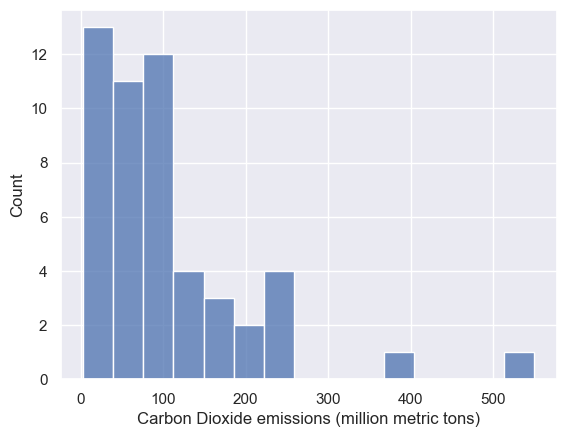

In [24]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.histplot(cleaned_co2_data['Carbon Dioxide emissions (million metric tons)'], bins = 15)

<AxesSubplot:xlabel='Carbon Dioxide emissions (million metric tons)'>

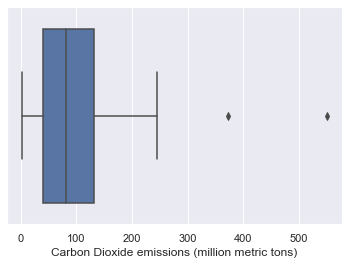

In [ ]:
sns.boxplot(x=cleaned_co2_data['Carbon Dioxide emissions (million metric tons)'])

<Axes: xlabel='population', ylabel='Count'>

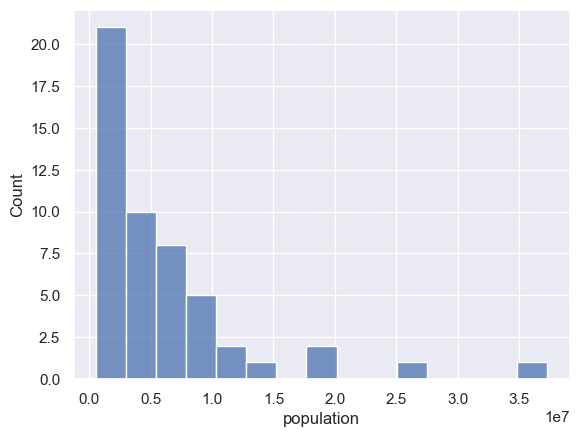

In [23]:
sns.histplot(cleaned_co2_data['population'], bins = 15)

### Dealing with outliers

In [14]:
# Obviously there are some outliers present 

# Without diving too deep, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher emissions (left side of the graph)
# Logic should also be applied

# Outliers are a great issue for OLS, thus we must deal with them in some way

# Let's declare a variable that will be equal to the 99th percentile of the 'Carbon Dioxide emissions (million metric tons)' variable

#DataFrame.quantile(the quantile)
q = cleaned_co2_data['Carbon Dioxide emissions (million metric tons)'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'emissions_quantity'
cleaned_co2_data_1 = cleaned_co2_data[cleaned_co2_data['Carbon Dioxide emissions (million metric tons)']<q]
# In this way we have essentially removed the top 1% of the data about 'emissions_quantity'
cleaned_co2_data_1.describe(include='all')

,State,population,Carbon Dioxide emissions (million metric tons),Biomass,Geothermal,Solar,Wind,Hydro,Coal,Petroleum,Gas,Nuclear,Other,Latitude,Longitude
count,50,5.000000e+01,50.00000,5.000000e+01,5.000000e+01,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.000000,50.000000
unique,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.672000e+06,96.34000,1.059097e+06,3.038661e+05,16159.760600,1.028201e+06,5.412592e+06,3.250758e+07,7.495862e+05,1.478847e+07,1.510508e+07,2.091236e+05,39.633029,93.254898
std,NaN,6.318993e+06,77.23397,1.296759e+06,1.850034e+06,88586.895155,1.663484e+06,1.216744e+07,3.132254e+07,1.731553e+06,2.417985e+07,2.035559e+07,4.212650e+05,6.009892,19.474544
min,NaN,5.636260e+05,3.00000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.236100e+02,0.000000e+00,0.000000e+00,0.000000e+00,21.094318,69.381927
25%,NaN,1.632272e+06,39.50000,7.022862e+04,0.000000e+00,0.000000,0.000000e+00,5.459763e+05,3.734038e+06,4.747533e+04,1.584099e+06,0.000000e+00,5.973900e+02,35.839934,78.579081
50%,NaN,4.085220e+06,79.50000,5.698430e+05,0.000000e+00,0.000000,1.388606e+05,1.578601e+06,2.781205e+07,1.668640e+05,6.012814e+06,8.792610e+06,3.247546e+04,39.999729,89.301322
75%,NaN,6.531672e+06,128.25000,1.527290e+06,0.000000e+00,0.000000,1.508584e+06,4.086883e+06,4.172626e+07,6.145921e+05,1.917000e+07,2.568425e+07,3.193204e+05,43.183955,103.929331


<Axes: xlabel='Carbon Dioxide emissions (million metric tons)', ylabel='Count'>

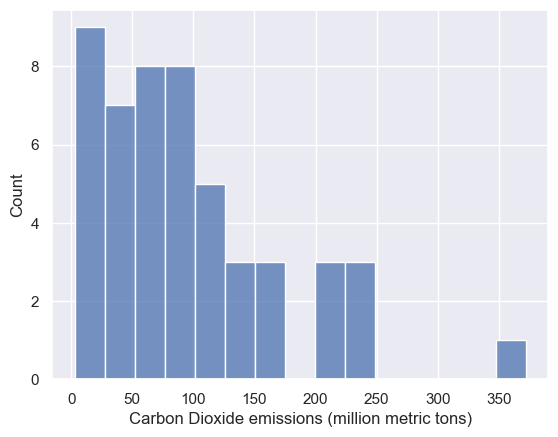

In [22]:
sns.histplot(cleaned_co2_data_1['Carbon Dioxide emissions (million metric tons)'], bins = 15)

In [16]:
# Adjusting the population outliers
q = cleaned_co2_data_1['population'].quantile(0.99)
cleaned_co2_data_2 = cleaned_co2_data_1[cleaned_co2_data_1['population']<q]

<Axes: xlabel='population', ylabel='Count'>

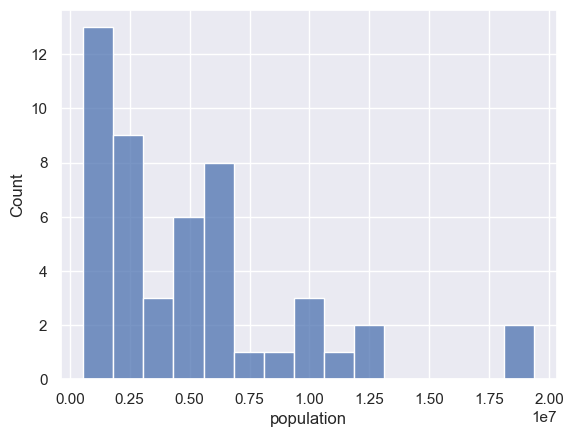

In [40]:
sns.histplot(cleaned_co2_data_2['population'],bins = 15)

In [43]:
cleaned_co2_data_2.describe(include='all')

,State,population,Carbon Dioxide emissions (million metric tons),Biomass,Geothermal,Solar,Wind,Hydro,Coal,Petroleum,Gas,Nuclear,Other,Latitude,Longitude
count,49,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00
unique,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5027469.82,90.71,956984.45,44295.26,4004.58,931539.13,4957602.25,33131237.48,731454.97,12728036.66,14765697.24,204405.19,39.70,92.72
std,NaN,4422430.20,66.89,1088303.00,234297.01,21675.12,1532291.71,11855991.62,31331905.01,1744694.77,19497556.99,20423114.46,424293.54,6.05,19.30
min,NaN,563626.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,123.61,0.00,0.00,0.00,21.09,69.38
25%,NaN,1567582.00,39.00,60163.01,0.00,0.00,0.00,520260.82,5345448.69,47275.04,1549874.74,0.00,533.92,35.75,78.17
50%,NaN,3831074.00,77.00,539982.46,0.00,0.00,64496.99,1576275.16,29084698.52,163054.22,5601116.38,8768548.00,31318.12,40.15,88.99
75%,NaN,6483802.00,120.00,1478309.69,0.00,0.00,1403191.55,3762026.20,41756838.99,523379.68,15776934.28,21851009.00,255891.29,43.33,99.78


### Reset the index

In [30]:
# When we remove observations, the original indexes are preserved
# If we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6
# That's very problematic as we tend to forget about it (later you will see an example of such a problem)

# Finally, once we reset the index, a new column will be created containing the old index (just in case)
# We won't be needing it, thus 'drop=True' to completely forget about it
co2_data_reset = cleaned_co2_data_2.reset_index(drop=True)

In [31]:
co2_data_reset.describe(include='all')

,State,population,Carbon Dioxide emissions (million metric tons),Biomass,Geothermal,Solar,Wind,Hydro,Coal,Petroleum,Gas,Nuclear,Other,Latitude,Longitude
count,49,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00,49.00
unique,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5027469.82,90.71,956984.45,44295.26,4004.58,931539.13,4957602.25,33131237.48,731454.97,12728036.66,14765697.24,204405.19,39.70,92.72
std,NaN,4422430.20,66.89,1088303.00,234297.01,21675.12,1532291.71,11855991.62,31331905.01,1744694.77,19497556.99,20423114.46,424293.54,6.05,19.30
min,NaN,563626.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,123.61,0.00,0.00,0.00,21.09,69.38
25%,NaN,1567582.00,39.00,60163.01,0.00,0.00,0.00,520260.82,5345448.69,47275.04,1549874.74,0.00,533.92,35.75,78.17
50%,NaN,3831074.00,77.00,539982.46,0.00,0.00,64496.99,1576275.16,29084698.52,163054.22,5601116.38,8768548.00,31318.12,40.15,88.99
75%,NaN,6483802.00,120.00,1478309.69,0.00,0.00,1403191.55,3762026.20,41756838.99,523379.68,15776934.28,21851009.00,255891.29,43.33,99.78


# Regression Analysis
---

### Visuals | Histograms

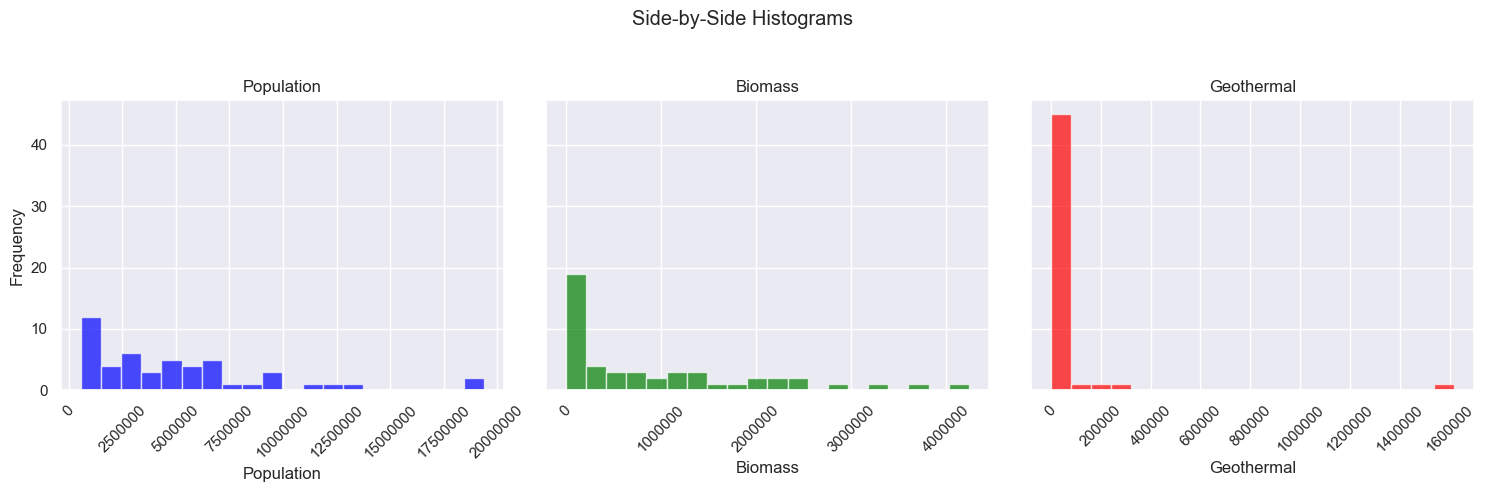

In [55]:
population = co2_data_reset['population']
Biomass = co2_data_reset['Biomass']
Geothermal = co2_data_reset['Geothermal']

# Create a 1x3 grid of subplots
# sharey=True to use the same y-axis scale
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)  

# Plot each histogram on a separate subplot
axes[0].hist(population, bins = 20, color='blue', alpha=0.7)
axes[0].set_title('Population')
axes[0].set_xlabel('Population')
axes[0].set_ylabel('Frequency')
axes[0].ticklabel_format(style='plain', axis='x')  # Disable scientific notation
axes[0].tick_params(axis='x', rotation=45)         # Rotate x-axis labels



axes[1].hist(Biomass, bins = 20, color='green', alpha=0.7)
axes[1].set_title('Biomass')
axes[1].set_xlabel('Biomass')
axes[1].ticklabel_format(style='plain', axis='x')
axes[1].tick_params(axis='x', rotation=45)

axes[2].hist(Geothermal, bins = 20, color='red', alpha=0.7)
axes[2].set_title('Geothermal')
axes[2].set_xlabel('Geothermal')
axes[2].ticklabel_format(style='plain', axis='x')
axes[2].tick_params(axis='x', rotation=45)


# Add a main title
fig.suptitle('Side-by-Side Histograms')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust to prevent overlap with the main title

# Display the plot
plt.show()

### Checking the OLS assumptions for linearity


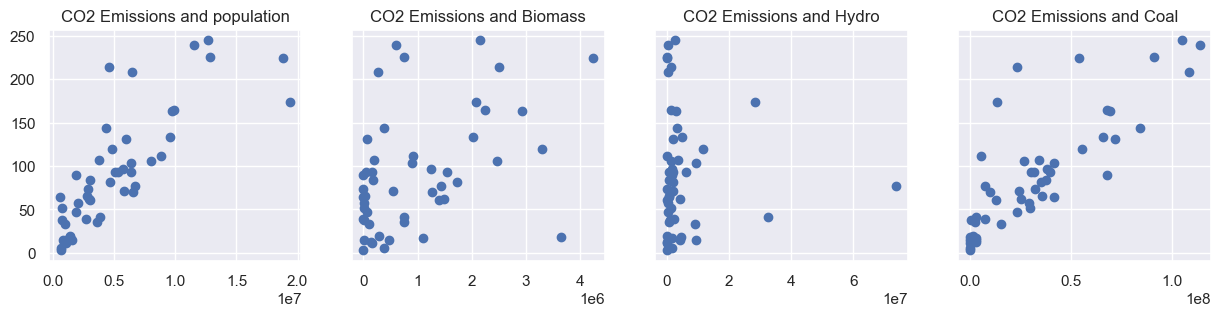

In [33]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(co2_data_reset['population'],co2_data_reset['Carbon Dioxide emissions (million metric tons)'])
ax1.set_title('CO2 Emissions and population')
ax2.scatter(co2_data_reset['Biomass'],co2_data_reset['Carbon Dioxide emissions (million metric tons)'])
ax2.set_title('CO2 Emissions and Biomass')
ax3.scatter(co2_data_reset['Hydro'],co2_data_reset['Carbon Dioxide emissions (million metric tons)'])
ax3.set_title('CO2 Emissions and Hydro')
ax4.scatter(co2_data_reset['Coal'],co2_data_reset['Carbon Dioxide emissions (million metric tons)'])
ax4.set_title('CO2 Emissions and Coal')


plt.show()

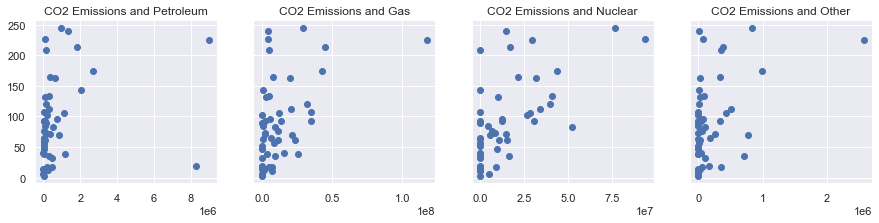

In [125]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(co2_data_cleaned['Petroleum'],co2_data_cleaned['Carbon Dioxide emissions (million metric tons)'])
ax1.set_title('CO2 Emissions and Petroleum')
ax2.scatter(co2_data_cleaned['Gas'],co2_data_cleaned['Carbon Dioxide emissions (million metric tons)'])
ax2.set_title('CO2 Emissions and Gas')
ax3.scatter(co2_data_cleaned['Nuclear'],co2_data_cleaned['Carbon Dioxide emissions (million metric tons)'])
ax3.set_title('CO2 Emissions and Nuclear')
ax4.scatter(co2_data_cleaned['Other'],co2_data_cleaned['Carbon Dioxide emissions (million metric tons)'])
ax4.set_title('CO2 Emissions and Other')


plt.show()

## Statsmodel Regression

### Declare the dependent and the independent variables

In [42]:
#easy to copy and paste x values
co2_data_cleaned.columns.values

array(['State', 'Region', 'population', 'Occupied Housing Units',
       'Govoner Party', 'Carbon Dioxide emissions (million metric tons)',
       'Biomass', 'Geothermal', 'Solar', 'Wind', 'Hydro', 'Coal',
       'Petroleum', 'Gas', 'Nuclear', 'Other', 'Total Generated ',
       'Total Non-Hydro RE (MWh)', 'Total RE Generation (MWh)',
       'Non Hydro RE Generation As total %',
       'All RE Generation as Total %', 'Non Hydro RE Energy', 'Latitude',
       'Longitude'], dtype=object)

In [109]:
y = co2_data_cleaned['Carbon Dioxide emissions (million metric tons)']
x1 = co2_data_cleaned[['population','Biomass','Geothermal','Solar', 'Wind', 'Hydro','Coal','Petroleum','Gas','Nuclear','Other']]

In [110]:
# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()

### Regression

In [112]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                          
==========================================================================================================
Dep. Variable:     Carbon Dioxide emissions (million metric tons)   R-squared:                       0.911
Model:                                                        OLS   Adj. R-squared:                  0.884
Method:                                             Least Squares   F-statistic:                     34.23
Date:                                            Tue, 01 Oct 2024   Prob (F-statistic):           4.83e-16
Time:                                                    15:11:45   Log-Likelihood:                -215.83
No. Observations:                                              49   AIC:                             455.7
Df Residuals:                                                  37   BIC:                             478.4
Df Model:                                                      11                                         
Covariance Type:                                        nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5817      6.388      1.030      0.310      -6.361      19.524
population  6.691e-06   1.82e-06      3.675      0.001       3e-06    1.04e-05
Biomass     2.623e-06   4.43e-06      0.592      0.557   -6.35e-06    1.16e-05
Geothermal  4.787e-05   6.18e-05      0.775      0.444   -7.74e-05       0.000
Solar         -0.0007      0.001     -0.962      0.342      -0.002       0.001
Wind        2.495e-06    2.4e-06      1.040      0.305   -2.37e-06    7.36e-06
Hydro      -2.481e-07   3.51e-07     -0.706      0.485    -9.6e-07    4.64e-07
Coal        1.201e-06   1.49e-07      8.069      0.000    8.99e-07     1.5e-06
Petroleum  -6.474e-07   2.73e-06     -0.237      0.814   -6.18e-06    4.88e-06
Gas          9.37e-07   3.38e-07      2.775      0.009    2.53e-07    1.62e-06
Nuclear      3.39e-08   2.58e-07      0.131      0.896   -4.89e-07    5.57e-07
Other      -2.113e-05   1.74e-05     -1.216      0.232   -5.63e-05    1.41e-05
==============================================================================
Omnibus:                       65.964   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              656.687
Skew:                           3.387   Prob(JB):                    2.52e-143
Kurtosis:                      19.606   Cond. No.                     9.99e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.99e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Results

- R-squared:	0.911 - amazing 
- Prob (F-statistic): 4.83e-16 - statistically significant
- not all x variables have a p value < 0.05 so need to drop

In [130]:
y = co2_data_cleaned['Carbon Dioxide emissions (million metric tons)']
x1 = co2_data_cleaned[['population','Coal','Gas']]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [131]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                          
==========================================================================================================
Dep. Variable:     Carbon Dioxide emissions (million metric tons)   R-squared:                       0.901
Model:                                                        OLS   Adj. R-squared:                  0.894
Method:                                             Least Squares   F-statistic:                     136.2
Date:                                            Tue, 01 Oct 2024   Prob (F-statistic):           1.38e-22
Time:                                                    15:36:20   Log-Likelihood:                -218.37
No. Observations:                                              49   AIC:                             444.7
Df Residuals:                                                  45   BIC:                             452.3
Df Model:                                                       3                                         
Covariance Type:                                        nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0244      5.068      1.978      0.054      -0.183      20.232
population  6.121e-06    1.1e-06      5.570      0.000    3.91e-06    8.33e-06
Coal         1.28e-06   1.24e-07     10.352      0.000    1.03e-06    1.53e-06
Gas         5.909e-07   2.15e-07      2.745      0.009    1.57e-07    1.02e-06
==============================================================================
Omnibus:                       72.102   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              915.906
Skew:                           3.732   Prob(JB):                    1.30e-199
Kurtosis:                      22.821   Cond. No.                     7.69e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.69e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### New Regression values

In [ ]:
y = co2_data_cleaned['Carbon Dioxide emissions (million metric tons)']
x1 = ['population','Coal','Gas','Other']

def get_stats():
    x2 = co2_data_cleaned[x1]
    x = sm.add_constant(x2)
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                          OLS Regression Results                                          
Dep. Variable:     Carbon Dioxide emissions (million metric tons)   R-squared:                       0.911
Model:                                                        OLS   Adj. R-squared:                  0.884
Method:                                             Least Squares   F-statistic:                     34.23
Date:                                            Tue, 01 Oct 2024   Prob (F-statistic):           4.83e-16
Time:                                                    15:13:31   Log-Likelihood:                -215.83
No. Observations:                                              49   AIC:                             455.7
Df Residuals:                                                  37   BIC:                             478.4
Df Model:                                                      11                                         
Covariance Type:                     